# NAIVE BAYES

**File:** NaiveBayes.ipynb

**Course:** Data Science Foundations: Data Mining in Python

# IMPORT LIBRARIES

only need to install once per codespace

In [7]:

# for errors
#pip install scikit-learn==1.2.2

In [8]:
# to correct error: Nonetype has no attribute split
#pip install -U threadpoolctl

In [9]:
import matplotlib.pyplot as plt                    # For plotting data
import seaborn as sns                              # For plotting data
import pandas as pd                                # For dataframes
from sklearn.naive_bayes import GaussianNB         # For naive Bayes classifier
#from sklearn.metrics import plot_confusion_matrix  # Evaluation measures

# newer version
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# LOAD AND PREPARE DATA
Load the training data `trn` and testing data `tst` from the CSV files in the data directory. Separate the data matrix from the class variable.

In [10]:
# Imports the training data
trn = pd.read_csv('data/spambase_trn.csv')

# Separates the attributes X0-X56 into X_trn
X_trn = trn.filter(regex='\d')

# Separates the class variable into y_trn
y_trn = trn.y

# Imports the testing data
tst = pd.read_csv('data/spambase_tst.csv')

# Separates the attributes X0-X56 into X_tst
X_tst = tst.filter(regex='\d')

# Separates the class variable into y_tst
y_tst = tst.y

# Class labels
spam = ['Not Spam','Spam']

Look at the first few rows of the training data.

In [11]:
trn.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,y
0,0.0,0.17,0.00,0.0,0.0,0.0,0.17,0.52,0.00,0.17,...,0.029,0.147,0.029,0.117,0.058,0.235,3.521,39,419,1
1,0.7,0.00,1.06,0.0,0.0,0.0,0.00,1.41,0.35,0.35,...,0.000,0.117,0.000,0.353,0.000,0.000,1.209,13,196,1
2,0.0,0.00,1.58,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.149,0.000,0.149,0.000,0.000,1.482,10,43,0
3,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,2.56,...,0.000,0.194,0.194,0.000,0.000,0.000,3.631,17,69,0
4,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,...,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1,3,0


# NAIVE BAYES: TRAIN MODEL
The code below creates a `GaussianNB` object to classify spam vs. not spam using the naive Bayes algorithm. 

In [12]:
nb = GaussianNB() \
    .fit(X_trn, y_trn)

## Calculate Mean Accuracy on Training Data

In [13]:
print(
    'Accuracy on training data: ' 
    + str("{:.2%}".format(nb.score(X_trn, y_trn))))

Accuracy on training data: 82.20%


# TEST MODEL
In this phase, we test the naive Bayes model on the test set `tst`. A good evaluation measure is the `confusion matrix` that gives the fraction of true positives, true negatives, false positives, and false negatives.

## Visualize the Confusion Matrix

Normalize the scores to display as proportions across rows.

In [ ]:
# plot_confusion_matrix(
#     nb, X_tst, y_tst,
#     display_labels=spam,
#     normalize='true')

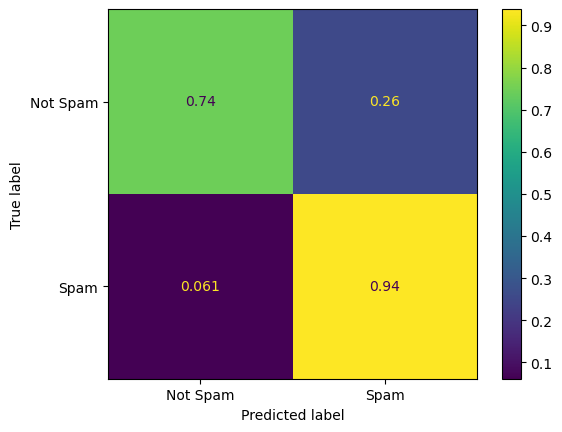

In [14]:
cm = confusion_matrix(y_tst,nb.predict(X_tst), labels=[0,1], normalize='true')
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=spam)
disp.plot()
plt.show()

## Calculate Mean Accuracy on Testing Data

In [15]:
print(
    'Accuracy on testing data: ' 
    + str("{:.2%}".format(nb.score(X_tst, y_tst))))

Accuracy on testing data: 82.04%


# CLEAN UP

- If desired, clear the results with Cell > All Output > Clear. 
- Save your work by selecting File > Save and Checkpoint.
- Shut down the Python kernel and close the file by selecting File > Close and Halt.